# 머신러닝 입문

In [3]:
# 세팅
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

In [4]:
iris_df = sns.load_dataset('iris')

In [5]:
# target 데이터 살펴보기, 나머지 feature

iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

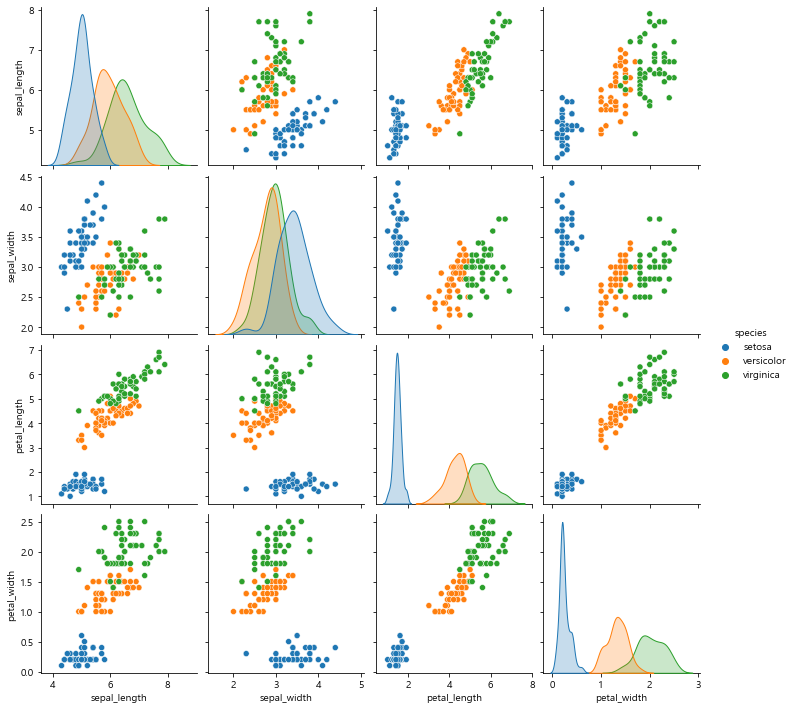

In [6]:
sns.pairplot( iris_df , hue='species')

## KNN 모델
- 제일 거리가 짧은 k개를 찾아서 판단
- 새로운 데이터가 왔을 때 
    1. 모든 데이터와 거리를 게산
    2. 가장 짧은 거리(가까운) k개의 데이터를 구함
    3. 이 k 개를 통해서 다수결 원리에 의해 새로운 데이터를 분류

In [7]:
# 직접 만들어 쓰는 것이 아니라 머신러닝 모듈을 사용

from sklearn.neighbors import KNeighborsClassifier

### 사이킷런
- 머신러닝 모듈
- 사용법
    1. 모델 만들기
    2. 데이터를 넣고 훈련
    3. 검증, 예측

In [8]:
# 1) 모델 만들기

knn_model = KNeighborsClassifier()

In [9]:
# 2) 데이터를 넣고 훈련
# feature => 2차원
# target => 1차원

y = iris_df['species']
X = iris_df.drop('species', axis=1)

In [10]:
knn_model.fit(X, y)

KNeighborsClassifier()

In [11]:
# 3) 검증, 예측

knn_model.predict( [ [5.0, 3.3, 1.2, 0.25], [5.0, 3.3, 1.2, 0.25] ] )

C:\Users\cypark\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa', 'setosa'], dtype=object)

## 데이터를 훈련용과 검증용으로 나누기

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 결과는 리스트
# [ train_x, test_x, train_y, test_y ]
# stratify : 비율을 비슷하게 해서 가져온다.

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, 
                                                    random_state=11, stratify=y )

In [14]:
len(train_x)

120

In [15]:
train_y.value_counts()

setosa        40
virginica     40
versicolor    40
Name: species, dtype: int64

In [16]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [17]:
knn_model = KNeighborsClassifier()

knn_model.fit( train_x, train_y )

knn_model.score( test_x, test_y )

1.0

### 오버피팅 문제 - 하이퍼파라미터 튜닝

In [24]:
from sklearn.model_selection import cross_val_score, KFold

In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

score_list = []
for k in range(2, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, train_x, train_y, cv=kf).mean()
    score_list.append(score)

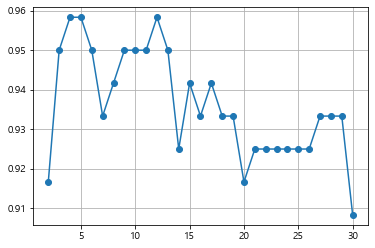

In [41]:
plt.plot(range(2, 31), score_list, marker='o')
plt.grid()

# feature engineering
- 특성값들을 머신러닝 모델에 적합하게 가공
- 문자를 숫자로 인코딩
- 숫자 데이터의 범위를 통일

# 타이타닉 데이터 분석

In [45]:
# Sibsp : 형제자매, Parch : 부모자식

path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\캐글 타이타닉\train.csv'
train_df = pd.read_csv(path)

In [46]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\캐글 타이타닉\test.csv'
test_df = pd.read_csv(path)

In [47]:
train_df.shape

(891, 12)

In [48]:
test_df.shape

(418, 11)

In [50]:
train_df.isna().sum() / len(train_df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [51]:
test_df.isna().sum() / len(test_df) *100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [52]:
total_titanic = pd.concat( [train_df, test_df], ignore_index=True )

## 1. 결측 데이터 처리

In [55]:
total_titanic.isna().sum() / len(total_titanic) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

### 1.1 Embarked 처리

In [59]:
total_titanic[ total_titanic['Embarked'].isna() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [60]:
total_titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

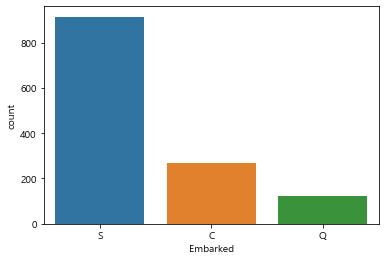

In [61]:
# Embarked 관찰

sns.countplot(data=total_titanic, x='Embarked')

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

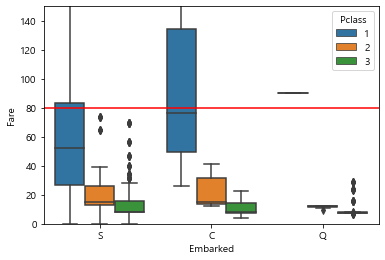

In [70]:
# Fare와 Em 관계 관찰

plt.ylim([0, 150])
plt.axhline(80, color='red')

sns.boxplot(data=total_titanic, x='Embarked', y='Fare', hue='Pclass')

In [79]:
# 결측 데이터를 'C' 로 채우기

total_titanic.loc[ total_titanic['Embarked'].isna(), 'Embarked' ] = 'C'

In [80]:
total_titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

# 숙제 점검

In [82]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\부동산 데이터 실습\사설학원 현황_시도별_행정구별(2013-2021).xlsx'

acad_df = pd.read_excel(path, sheet_name=2, skiprows=3)

In [85]:
# 2021년도 & 입시검정및보습

cond1 = acad_df['연도'] == 2021
cond2 = acad_df['분야'] == '입시검정및보습'

acad_df2 = acad_df[ cond1 & cond2 ]

In [86]:
acad_df2['시도'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [95]:
acad_df2[acad_df2['행정구역'] == '소계']

,연도,시도,행정구역,종류,분야,학원수,정원,강사수,강의실수,월평균교습시간(시간),월평균교습비(원)
25518,2021,세종,세종시,학교교과교습학원,입시검정및보습,395,17471,1452,1780,28,195435
25531,2021,세종,세종,학교교과교습학원,입시검정및보습,395,17471,1452,1780,28,195435


In [90]:
acad_df2.loc[25531, '행정구역'] = '세종'

In [93]:
acad_df3 = acad_df2[acad_df2['행정구역'] != '소계']

In [98]:
acad_df3 = acad_df3.drop(25518)
acad_df3['행정구역'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '서구', '동구',
       '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구', '연제구',
       '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '연수구', '미추홀구', '남동구',
       '부평구', '계양구', '강화군', '옹진군', '광산구', '유성구', '대덕구', '울주군', '세종',
       '수원시', '성남시', '부천시', '안양시', '과천시', '안산시', '용인시', '군포시', '의왕시',
       '시흥시', '평택시', '화성시', '오산시', '광명시', '광주시', '하남시', '김포시', '이천시',
       '안성시', '여주시', '양평군', '고양시', '남양주시', '구리시', '의정부시', '파주시', '동두천시',
       '양주시', '포천시', '가평군', '연천군', '춘천시', '원주시', '강릉시', '동해시', '태백시',
       '속초시', '삼척시', '홍천군', '횡성군', '영월군', '평창군', '정선군', '철원군', '화천군',
       '양구군', '인제군', '고성군', '양양군', '청주시', '충주시', '제천시', '보은군', '옥천군',
       '영동군', '진천군', '괴산군', '음성군', '단양군', '증평군', '천안시', '공주시', '보령시',
       '아산시', '서산시', '논산시', '계룡시', '금산군', '부여군', '서천군', '청양군', '홍성군',
       '예산군', '태안

In [99]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\부동산 데이터 실습\아파트 실거래가 2021\202105_실거래가.xlsx'
apt_df = pd.read_excel(path, index_col=0)

In [102]:
apt_df['시도'] = apt_df['시도'].apply(short_sido)
temp_apt = apt_df.groupby(['시도', '구군']).mean()

In [101]:
def short_sido(x):
    if len(x)==4:
        return x[0]+x[2]
    else:
        return x[:2]

In [103]:
temp_apt

거래유형         건축년도       년    월          일       전용면적  중개사소재지  \
시도 구군                                                                      
강원 강릉시       NaN  2000.275281  2021.0  5.0  16.426966  63.211493     NaN   
   고성군       NaN  2007.791667  2021.0  5.0  15.750000  64.816583     NaN   
   동해시       NaN  2000.707143  2021.0  5.0  15.885714  64.932959     NaN   
   삼척시       NaN  2001.017544  2021.0  5.0  14.175439  58.246074     NaN   
   속초시       NaN  2000.843750  2021.0  5.0  16.773438  67.369543     NaN   
...          ...          ...     ...  ...        ...        ...     ...   
충북 청주시 상당구   NaN  2001.092308  2021.0  5.0  15.187692  73.447328     NaN   
   청주시 서원구   NaN  1998.682028  2021.0  5.0  16.459293  66.648894     NaN   
   청주시 청원구   NaN  2002.189394  2021.0  5.0  15.583333  68.934844     NaN   
   청주시 흥덕구   NaN  2000.451737  2021.0  5.0  16.922780  68.784312     NaN   
   충주시       NaN  1997.292271  2021.0  5.0  16.678744  59.868889     NaN   

                   층  
시도 구군                 
강원 강릉시      7.143258  
   고성군      8.333333  
   동해시      7.742857  
   삼척시      9.192982  
   속초시      8.386719  
...              ...  
충북 청주시 상당구  8.203077  
   청주시 서원구  7.883257  
   청주시 청원구  8.655303  
   청주시 흥덕구  8.793436  
   충주시      6.014493  

[245 rows x 8 columns]

In [104]:
apt_df

,시도,구군,거래금액,거래유형,건축년도,법정동,아파트,년,월,일,전용면적,중개사소재지,지번,층
0,서울,종로구,"32,000",NaN,1999,통인동,효자,2021,5,13,61.4900,NaN,5-1,3
1,서울,종로구,"177,700",NaN,2008,사직동,광화문스페이스본(101동~105동),2021,5,24,151.8100,NaN,9,8
2,서울,종로구,"78,000",NaN,1981,신문로1가,신문로맨션,2021,5,16,91.5300,NaN,238,9
3,서울,종로구,"80,000",NaN,2008,견지동,대성스카이렉스,2021,5,8,116.0300,NaN,110,14
4,서울,종로구,"31,700",NaN,2003,익선동,현대뜨레비앙,2021,5,3,46.6400,NaN,55,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59105,세종,세종특별자치시,"3,000",NaN,2002,장군면 금암리,정보마을,2021,5,11,28.2616,NaN,259-1,3
59106,세종,세종특별자치시,"5,300",NaN,2002,장군면 금암리,정보마을,2021,5,11,55.4621,NaN,259-1,5
59107,세종,세종특별자치시,"9,100",NaN,1991,전의면 동교리,"재동(1,2동)",2021,5,1,59.8800,NaN,121-6,3
59108,세종,세종특별자치시,"6,300",NaN,1991,전의면 동교리,"재동(1,2동)",2021,5,4,58.8800,NaN,121-6,5
